`this ipynb file is created for WordCloud Visualizations for overall DB`

###**Installing & Importing Packages**

In [ ]:
!pip install contractions #didn't = did not
!pip install better_profanity #removing swear words

     |████████████████████████████████| 106 kB 16.9 MB/s 
     |████████████████████████████████| 287 kB 32.7 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import regex
import contractions
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from math import isnan
import matplotlib.pyplot as plt
from better_profanity import profanity

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

###**Uploading DF**

In [ ]:
df = pd.read_csv('Main_Final.csv', sep=',')

In [ ]:
df = df[['character','text','number', 'gender','movie_name']]

###**Preprocessing**


*   **Contractions**
*   **Removing Special Characters**
*   **Tokenization**
*   **Pos_Tag**

In [ ]:
def preprocess_for_visual(df):
  '''handling contractions, removing special characters, tokenization, pos_tag'''
  df['full_without_contractions']=df.apply(lambda row: contractions.fix(row['text']), axis=1)    #(didn't => did not) so on
  df['tokenized_text'] = df.apply(lambda row: regex.sub(r"[^a-zA-Z0-9]+"," ",row['full_without_contractions']), axis=1) #remove special characters
  #df['tokenized_text'] = df.apply(lambda row: (row['tokenized_text'].lower()), axis=1)
  df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['tokenized_text']), axis=1) #tokenize sentence to words
  #df['length'] = df.apply(lambda row: len(row['tokenized_text']), axis=1) 
  df['pos_tag'] = df.apply(lambda row: nltk.pos_tag(row['tokenized_text']), axis=1)
  df['pos_tag'] = df.apply(lambda row: dict((pos, word) for (word, pos) in row['pos_tag']), axis=1)
  
  return df

In [ ]:
df=preprocess_for_visual(df)

In [ ]:
#for further visualizations only 3 columns needed: character, gender, pos_tag
X = pd.DataFrame(df.groupby(['character','gender'])['pos_tag'].apply(list))

In [ ]:
def MergeByPart(row):
  '''function MergeByPart is created for collecting all words 
  for particular part of speech(NN,VB,JJ and etc) and creating dictionary
  {'NN':'#all nouns that specific character used',...}
  '''
  res = {}
  for dict in row:
      for list in dict:
          if list in res:
              res[list] += (','+dict[list])
          else:
              res[list] = dict[list]
  return res

X['pos_tag'] = X.apply(lambda row: MergeByPart(row['pos_tag']), axis=1)

In [ ]:
X

,,pos_tag
character,gender,
A.J.,male,"{'WP': 'What,What,what,what,What,what,who,What..."
ABERFORTH,male,"{'IN': 'In,that,bout,if,of,Did,In,that,of,as,i..."
AGENT COULSON,male,"{'DT': 'the,the,the,the,no,This,the,the,This,t..."
AIBILEEN,female,"{'PRP': 'I,I,It,You,it,it,you,you,them,she,she..."
ALAN TURING,male,"{'NNP': 'Are,Important,Pay,Undiluted,Simpson,S..."
...,...,...
YULE MAY,female,"{'VBZ': 'Is,is,is', 'DT': 'that,All,the,the,a,..."
ZALUCHI,male,"{'PRP': 'they,them', 'RB': 'not,so', 'VBP': 'e..."
ÉOMER,male,"{'NNP': 'Find,Mordor,Orcs,Saruman,Speak,Dwarf,..."


In [ ]:
X = pd.concat([X.drop(['pos_tag'], axis = 1), X['pos_tag'].apply(pd.Series)], axis = 1) #for creating columns fro each POS (part of speech)

In [ ]:
X.columns #parts of speech that we have now

Index(['WP', 'VBD', 'PRP$', 'RB', 'IN', 'JJ', 'NNS', 'VBP', 'VBZ', 'NN', 'PRP',
       'NNP', 'DT', 'MD', 'VB', 'VBN', 'CC', 'TO', 'VBG', 'WRB', 'WDT', 'RP',
       'RBR', 'JJR', 'CD', 'EX', 'PDT', 'JJS', 'UH', 'RBS', 'NNPS', 'WP$',
       'FW', '''', '$', 'POS'],
      dtype='object')

##**Word Cloud**

###**ONLY WITH NN,VB**

In [ ]:
DF = X[['NN','VB']]

In [ ]:
DF = DF.groupby(['gender']).agg({'NN': list, 'VB': list})

###**WORDCLOUD = NOUN**

In [ ]:
# here removing nan values (type is given as float)
DF.NN[0] = [b for b in DF.NN[0] if not isinstance(b, float)]
DF.NN[1] = [b for b in DF.NN[1] if not isinstance(b, float)]

In [ ]:
female_nouns = ''.join(DF.NN[0])
female_nouns = profanity.censor(female_nouns, '')
female_nouns = female_nouns.split(',')

In [ ]:
male_nouns=' '.join(DF.NN[1])
male_nouns = profanity.censor(male_nouns, '')
male_nouns = male_nouns.split(',')

In [ ]:
#removing common words for better visuals
def remove_common(a, b):
    for i in a[:]:
        if i in b:
            a.remove(i)
            b.remove(i)

remove_common(female_nouns, male_nouns)

In [ ]:
#rechecking POS tag = this nltk function need an improvement
male_nouns_upd = []
text_mn = word_tokenize(' '.join([str(elem) for elem in male_nouns]))
mn = nltk.pos_tag(text_mn)
for i in range(len(mn)):
  if mn[i][1] == 'NN':
    male_nouns_upd.append((mn[i][0]))

In [ ]:
female_nouns_upd = []
text_fn = word_tokenize(' '.join([str(elem) for elem in female_nouns]))
fn = nltk.pos_tag(text_fn)
for i in range(len(fn)):
  if fn[i][1] == 'NN':
    female_nouns_upd.append((fn[i][0]))

Frequently Used Nouns


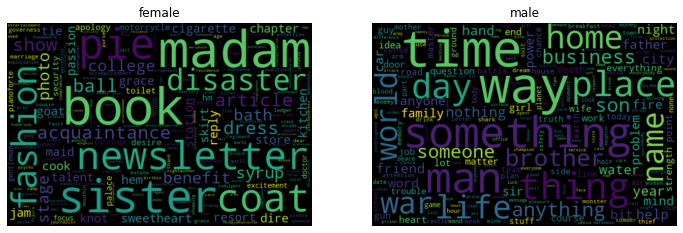

In [ ]:
print('\033[1m'+"Frequently Used Nouns"+'\033[0m')
fig,(ax,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(12,12))
female_nouns=' '.join(female_nouns_upd)
male_nouns=' '.join(male_nouns_upd)
stopwords = set(STOPWORDS)
ax=plt.subplot(121)
ax.title.set_text('female')
wordCloud_vis_female=WordCloud(stopwords= stopwords, width=600, height=400, random_state=42,max_font_size=100).generate(female_nouns)
plt.imshow(wordCloud_vis_female,interpolation='bilinear')
plt.axis("off")
ax2=plt.subplot(122)
wordCloud_vis_male=WordCloud(stopwords= stopwords, width=600, height=400, random_state=42,max_font_size=100).generate(male_nouns)
ax2.title.set_text('male')
plt.imshow(wordCloud_vis_male,interpolation='bilinear')
plt.axis("off")
fig.savefig('wordCloud_upt.png', dpi = 400)
#plt.show()